# Path Loss Characteristic

This project aims for improving quality(Error Rate - RMSE) of **existing linear regression model**[^1] by applying variety of optimizing(machine learning) modeling techniques. <br>
The object function in residential area,
$$
L_{p}(d)[dB] = L_p(d_0) + 10nlog_{10}(d/d_{0}) + X_{\sigma}
$$

[^1]: Han-Shin Jo, and Jong-Gwan Yook. “Path Loss Characteristics for IMT-Advanced Systems in Residential and Street Environments.” IEEE Antennas and Wireless Propagation Letters 9 (2010): 867–871. Web.

## 1. Linear Regression

### 1.a. Linear Regression (Least Square)

Linear Regression fits a linear model with coefficient w to minimize the residual sum of squares between observed y and prediction values. 
$$ \min_{w}||Xw - y||_2^2 $$


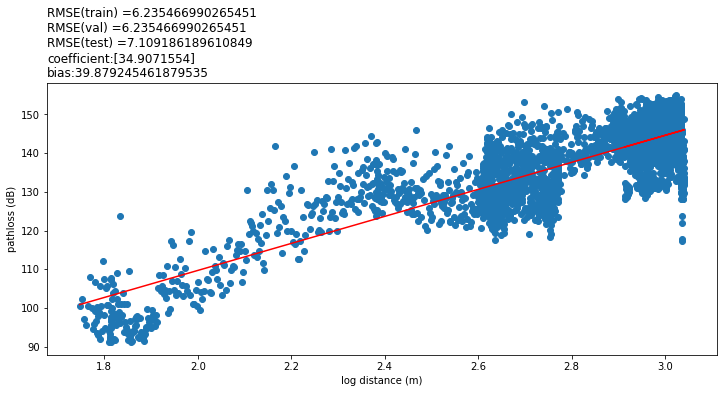

In [9]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from LIN_REG.data_loader import data_loader_pathloss

X_train, y_train, X_val, y_val, X_test, y_test = data_loader_pathloss('PLdata.mat')

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

train_prediction = model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train-train_prediction)**2));

val_prediction = model.predict(X_val)
val_rmse = np.sqrt(np.mean((y_val-val_prediction)**2));

test_prediction = model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test-test_prediction)**2));

plt.figure(figsize=(12, 5))
ax = plt.axes()
ax.scatter(X_train, y_train)
ax.plot(X_train, train_prediction, color="red")
plt.title("RMSE(train) =" + str(train_rmse)
          + "\nRMSE(val) =" + str(val_rmse)
          + "\nRMSE(test) =" + str(test_rmse)
          + "\ncoefficient:" + str(model.coef_)
          + "\nbias:" + str(model.intercept_),loc='left')
ax.set_xlabel('log distance (m)')
ax.set_ylabel('pathloss (dB)')

plt.show()

### 1.b. Ridge Regression
Ridge Regression adopts a penalty on size of coefficient(regularization) to avoid overfitting.
$$ \min_{w}||Xw - y||_2^2 + a||w||_2^2 $$


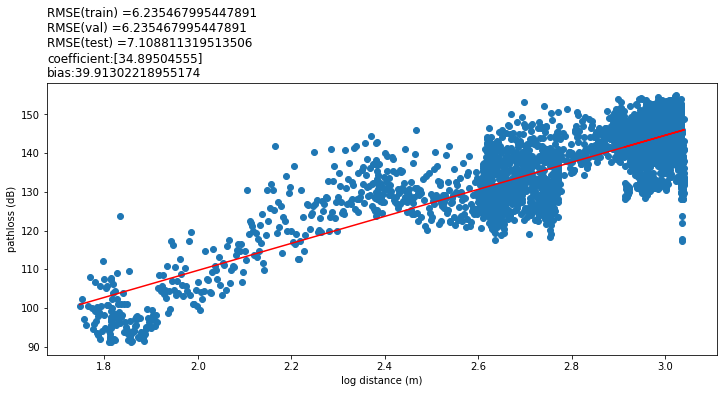

In [12]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from LIN_REG.data_loader import data_loader_pathloss

X_train, y_train, X_val, y_val, X_test, y_test = data_loader_pathloss('PLdata.mat')

model = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
model.fit(X_train, y_train)

train_prediction = model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train-train_prediction)**2));

val_prediction = model.predict(X_val)
val_rmse = np.sqrt(np.mean((y_val-val_prediction)**2));

test_prediction = model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test-test_prediction)**2));

plt.figure(figsize=(12, 5))
ax = plt.axes()
ax.scatter(X_train, y_train)
ax.plot(X_train, train_prediction, color="red")
plt.title("RMSE(train) =" + str(train_rmse)
          + "\nRMSE(val) =" + str(val_rmse)
          + "\nRMSE(test) =" + str(test_rmse)
          + "\ncoefficient:" + str(model.coef_)
          + "\nbias:" + str(model.intercept_),loc='left')
ax.set_xlabel('log distance (m)')
ax.set_ylabel('pathloss (dB)')

plt.show()

### 1.c. Lasso Regression

he Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent

$$ \min_{w}\frac{1}{2n_{samples}}||Xw - y||_2^2 + a||w||_2^2 $$

The lasso estimate thus solves the minimization of the least-squares penalty with  added, where  is a constant and  is the -norm of the parameter vector.

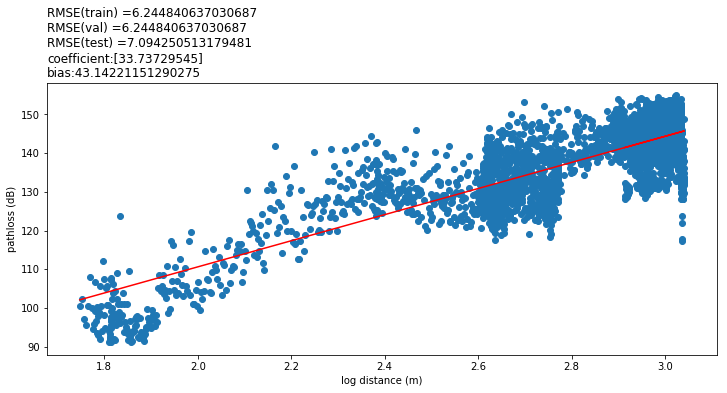

In [16]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from LIN_REG.data_loader import data_loader_pathloss

X_train, y_train, X_val, y_val, X_test, y_test = data_loader_pathloss('PLdata.mat')

model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)

train_prediction = model.predict(X_train)
train_rmse = np.sqrt(np.mean((y_train-train_prediction)**2));

val_prediction = model.predict(X_val)
val_rmse = np.sqrt(np.mean((y_val-val_prediction)**2));

test_prediction = model.predict(X_test)
test_rmse = np.sqrt(np.mean((y_test-test_prediction)**2));

plt.figure(figsize=(12, 5))
ax = plt.axes()
ax.scatter(X_train, y_train)
ax.plot(X_train, train_prediction, color="red")
plt.title("RMSE(train) =" + str(train_rmse)
          + "\nRMSE(val) =" + str(val_rmse)
          + "\nRMSE(test) =" + str(test_rmse)
          + "\ncoefficient:" + str(model.coef_)
          + "\nbias:" + str(model.intercept_),loc='left' )
ax.set_xlabel('log distance (m)')
ax.set_ylabel('pathloss (dB)')

plt.show()

## 2. Nonlinear Regression

In order to derive better fitting model, increase dimesions by applying nonlinear combination of model parameters. The model is fitted by a method of successive approximation.

### 2.a. Polynomial Regression
A simple linear regression can be extended by constructing polynomial features from the coefficients.
$$ z = [x_1,x_2,x_1^2,x_1x_2,x_2^2] $$
$$ \hat{y}(w,x) = w_0 + w_1z_1 + w_2z_2 + w_3z_3 + w_4z_4 + w_5z_5 $$

coefficient:[-5.90992646e-12  4.94286813e-11 -2.66747351e-11  5.38529328e-12
 -1.77021302e-12 -1.84984217e-12  2.59642069e-13 -1.70828118e-13
  1.24823460e-13  3.29732005e-13  4.44882256e-16  9.72370890e-16
  2.10142625e-15  4.49380672e-15  9.51277733e-15  1.99366748e-14
  4.13634162e-14  8.49343263e-14  1.72529964e-13  3.46498125e-13
  6.87482530e-13  1.34629725e-12  2.59926257e-12  4.94090615e-12
  9.23246187e-12  1.69261298e-11  3.03765587e-11  5.32188799e-11
  9.07147409e-11  1.49816123e-10  2.38453092e-10  3.63251590e-10
  5.24708478e-10  7.09240414e-10  8.79278835e-10  9.66615242e-10
  8.80422676e-10  5.46120052e-10 -1.62566350e-11 -6.02675024e-10
 -8.26568122e-10 -3.67064004e-10  5.24826432e-10  7.98839597e-10
 -2.58215928e-10 -9.01327053e-10  9.17345495e-10 -3.99252037e-10
  9.30649650e-11 -1.14282270e-11  5.84285998e-13]
bias:100.6463615442376


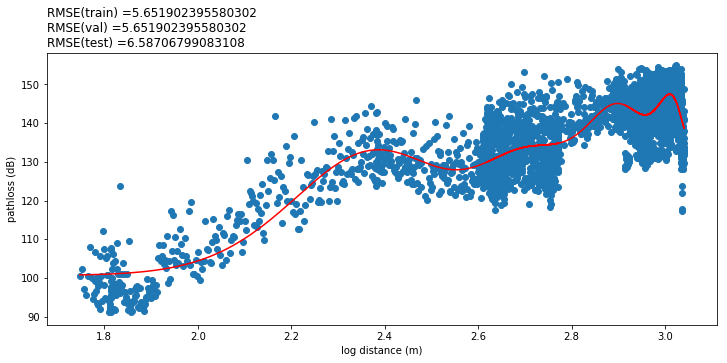

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from LIN_REG.data_loader import data_loader_pathloss

import numpy as np
import matplotlib.pyplot as plt

m = 50
X_train, y_train, X_val, y_val, X_test, y_test = data_loader_pathloss('PLdata.mat')

polynomial_features= PolynomialFeatures(degree=m)
X_train_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

train_prediction = model.predict(X_train_poly)
train_rmse = np.sqrt(np.mean((y_train-train_prediction)**2));

X_val_poly = polynomial_features.fit_transform(X_val)
val_prediction = model.predict(X_val_poly)
val_rmse = np.sqrt(np.mean((y_val-val_prediction)**2));

X_test_poly = polynomial_features.fit_transform(X_test)
test_prediction = model.predict(X_test_poly)
test_rmse = np.sqrt(np.mean((y_test-test_prediction)**2));

print("coefficient:" + str(model.coef_))
print("bias:" + str(model.intercept_))

plt.figure(figsize=(12, 5))
ax = plt.axes()
ax.scatter(X_train, y_train)
ax.plot(X_train, train_prediction, color="red")
plt.title("RMSE(train) =" + str(train_rmse)
          + "\nRMSE(val) =" + str(val_rmse)
          + "\nRMSE(test) =" + str(test_rmse), loc="left")

ax.set_xlabel('log distance (m)')
ax.set_ylabel('pathloss (dB)')

plt.show()


### 2.b. Neural-Net (Multi-Layer Perceptron)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. A MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function.

<img src="http://pubs.sciepub.com/ajmm/3/3/1/bigimage/fig5.png" width="500" height="100">

Using Multi-layer Perceptron regressor. (https://scikitlearn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

##### 2.b.1. Trained Model
Based on 3 layers with the number of hidden units for the lowest training error.

-> Sigmoid activation function with Newton Method.
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
\#of hidden layers : 241<br>
RMSE(train) : 5.5146119262381275<br>
RMSE(test) : 6.702577928856716<br>
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/regression_hu_logistic_lbfgs.png?raw=true">

-> Relu activation function with Newton Method.
$$g(x) = max(0, x)$$
\#of hidden layers : 61<br>
RMSE(train) : 5.622327650333526<br>
RMSE(test) : 6.455708080302873<br>
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/regression_hu_relu_lbfgs.png?raw=true">

-> tanh activation function with Newton Method.
$$tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z-e^{-z}}{e^z+e^{-z}}$$
\#of hidden layers : 211<br>
RMSE(train) : 5.592724569008998<br>
RMSE(test) : 6.997759503046849<br>
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/regression_hu_tanh_lbfgs.png?raw=true">

##### 2.b.1. RMSE with different number of hidden layers

-> Sigmoid activation function with Newton Method.
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/trend_hl_logistic_lbfgs.png?raw=true">

-> Relu activation function with Newton Method.
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/trend_hl_relu_lbfgs.png?raw=true">

-> tanh activation function with Newton Method.
<img src="https://github.com/chanship/pathloss/blob/master/MLP/dumpDir/trend_hl_tanh_lbfgs.png?raw=true">

##### 2.b.2. RMSE with different number of hidden units

-> Sigmoid activation function with Newton Method.
$$\sigma(z) = \frac{1}{1+e^{-z}}$$
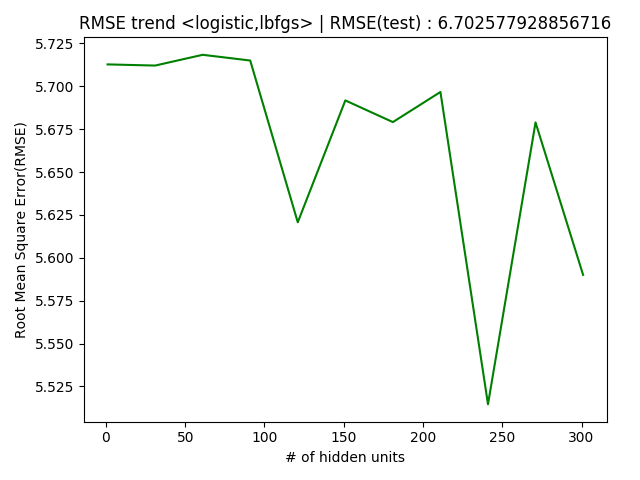

-> Relu activation function with Newton Method.
$$g(x) = max(0, x)$$
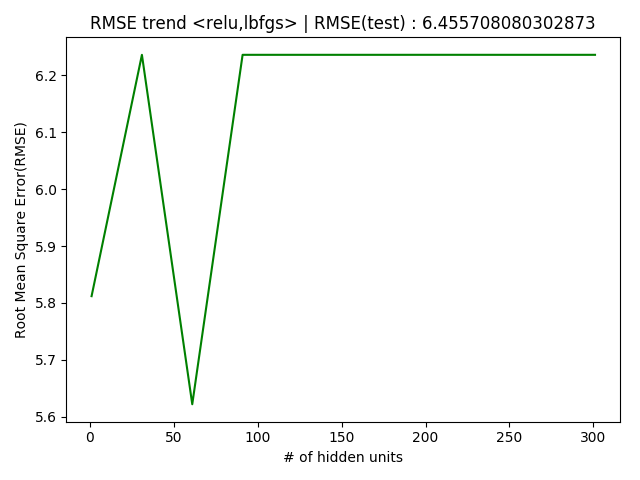

-> tanh activation function with Newton Method.
$$tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z-e^{-z}}{e^z+e^{-z}}$$
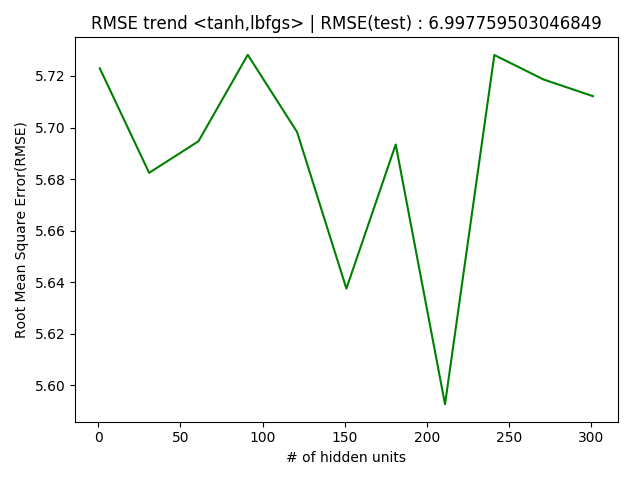

### 2.c. SVR (Support Vector Regression)